# Technical Requirements

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.rc("figure", figsize=(16, 5))

# Forecasting Time Series Data using Auto_ARIMA

In [8]:
import pmdarima as pm

In [9]:
milk_file = Path('../../datasets/Ch11/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(milk, test_size=0.10, shuffle=False)
# same results using pmdarima
train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

In [21]:
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 1)
Test: (17, 1)


**Using `diff` from `statsmodels`**

In [15]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [16]:
milk.diff(1).head()

,production
month,
1962-01-01,NaN
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0


<AxesSubplot:xlabel='month'>

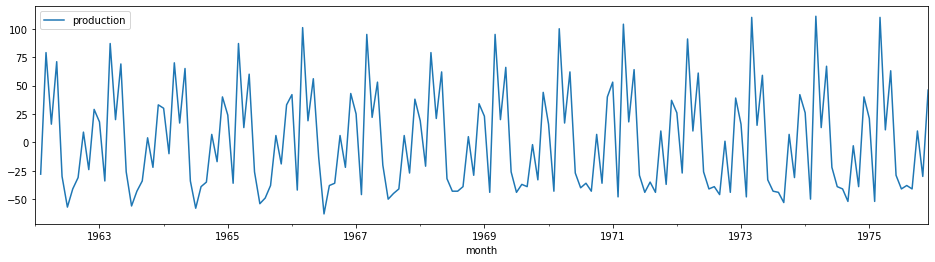

In [17]:
milk.diff(1).plot()

<AxesSubplot:xlabel='month'>

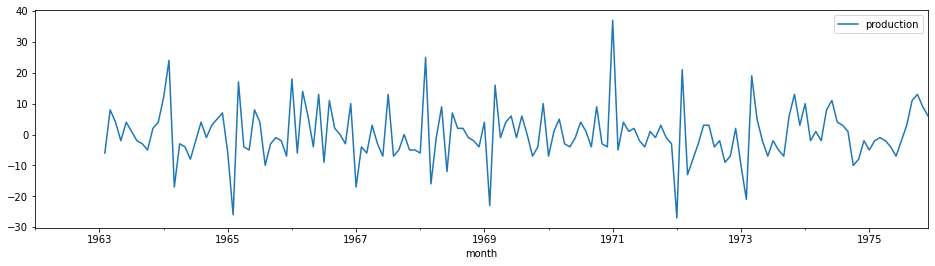

In [18]:
# twice differencing 
milk.diff(12).diff(1).plot()

In [19]:
diff(milk ,k_diff=1).head()

,production
month,
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0
1962-06-01,-30.0


<AxesSubplot:xlabel='month'>

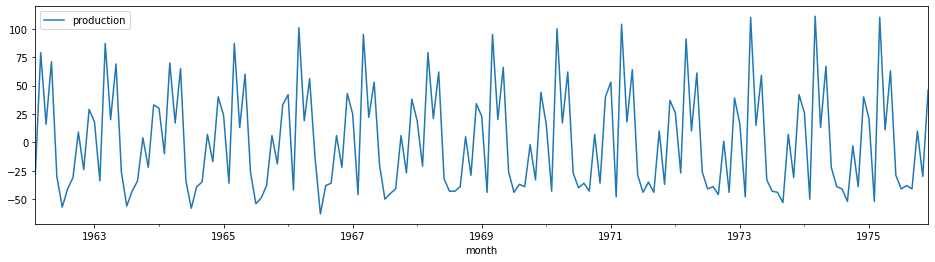

In [20]:
diff(milk ,k_diff=1).plot()

In [22]:
milk.diff(12).diff(1).dropna().head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [23]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [24]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [25]:
from statsmodels.tsa.stattools import acf, pacf, acovf, pacf_ols, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf, seasonal_plot
from scipy.stats import pearsonr

In [26]:
acf(milk, fft=False, nlags=10)

array([1.        , 0.89157378, 0.77817897, 0.62027149, 0.48666361,
       0.4281481 , 0.37606367, 0.41477252, 0.45425153, 0.56181499,
       0.68655906])

In [27]:
pearsonr(milk.values.ravel(), milk.values.ravel())

(1.0, 0.0)

In [29]:
for i in range(0, 11):
    d = milk.shift(i).dropna()
    m = milk.iloc[i:]
    p = pearsonr(m.values.ravel(), d.values.ravel())
    print(p[0])

1.0
0.9007955369510077
0.7956520464161647
0.6380100541047523
0.5030171621999081
0.44441611731441033
0.3937119642439715
0.44127243314740167
0.495161590176578
0.6248312041652151
0.777619915657277


**PACF and ACF**

In [30]:
m = milk.copy()
m.index.freq = 'MS'
m.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


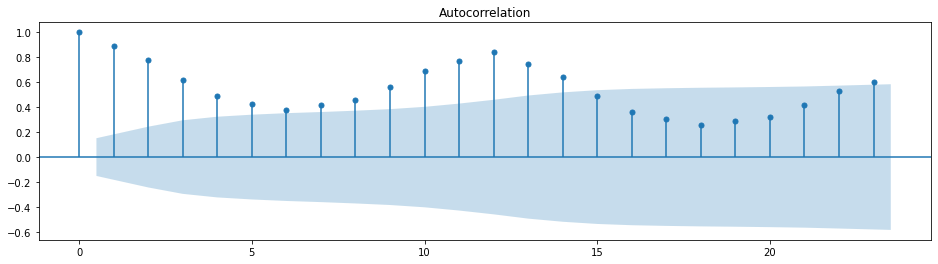

In [31]:
plot_acf(milk);

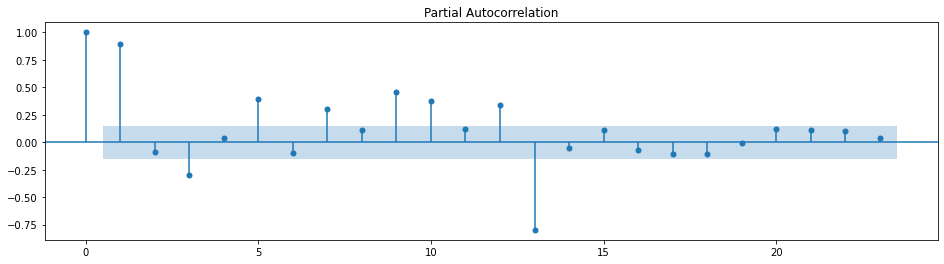

In [32]:
plot_pacf(milk);

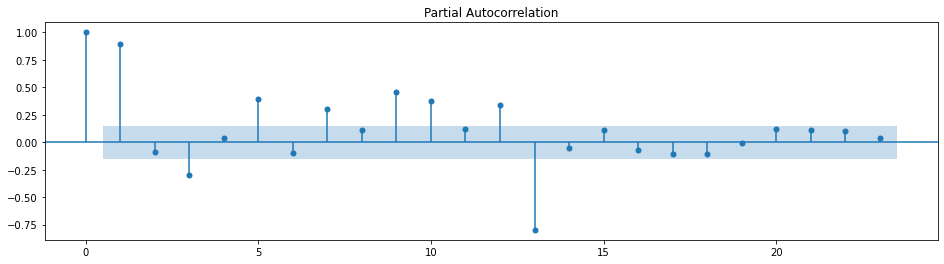

In [33]:
plot_pacf(milk, method='ywunbiased');

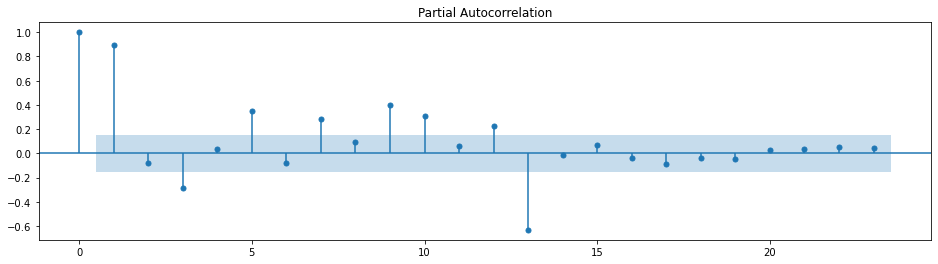

In [34]:
plot_pacf(milk, method='ywmle');

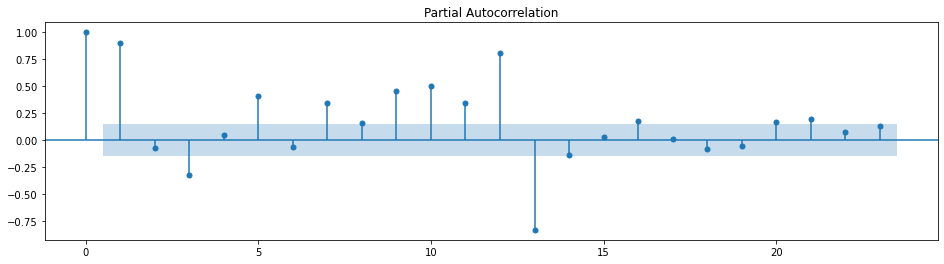

In [35]:
plot_pacf(milk, method='ols');

In [36]:
pacf(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [37]:
# same as pacf_yw(milk, nlags=13)
# same as pacf(milk, nlags=13)
# same as pacf_yw(milk, nlags=13, method='unbiased')
pacf(milk, nlags=13, method='ywunbiased')

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [38]:
# same as pacf_yw(milk, nlags=13, method='mle')
pacf(milk, nlags=13, method='ywm') 

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [39]:
# same as pacf_ols(milk, nlags=13)
pacf(milk, nlags=13, method='ols')

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [40]:
pacf_ols(milk, nlags=13)

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [41]:
pacf_yw(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [42]:
pacf_yw(milk, nlags=13, method='mle')

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [43]:
from pandas.plotting import autocorrelation_plot, lag_plot

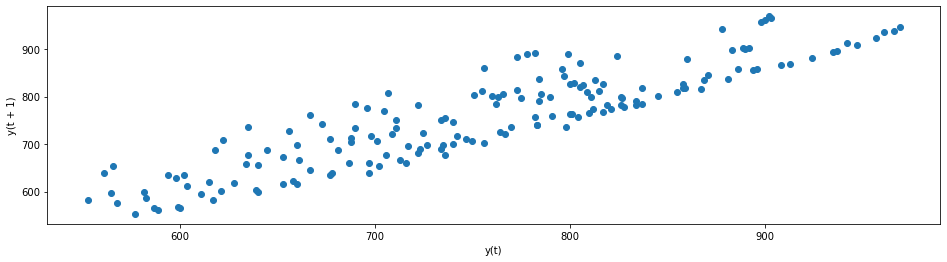

In [44]:
lag_plot(milk);

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

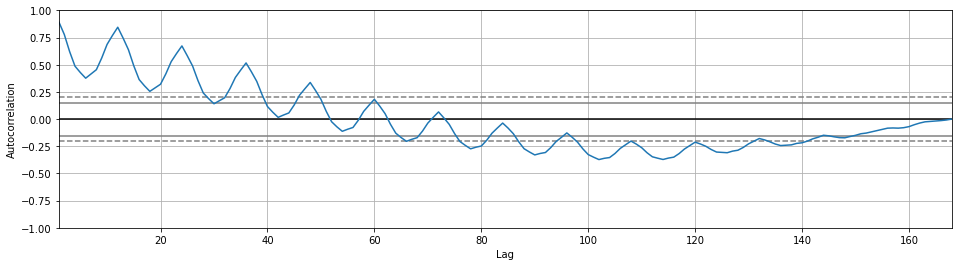

In [45]:
autocorrelation_plot(milk)

## How to do it

In [46]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Sat, 26 Mar 2022   AIC                            956.016
Time:                                    02:25:27   BIC                            964.798
Sample:                                         0   HQIC                           959.585
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (Q):                       24.04   Jarque-Bera (JB):                31.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.51 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.11 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.22 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [31]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           information_criterion='bic',
                           stepwise=True,
                           trace=True)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=982.369, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1008.269, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=980.596, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=964.798, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1002.362, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=969.691, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=969.676, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=980.720, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=974.652, Time=0.50 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=970.329, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=969.593, Time=0.19 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=969.493, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=965.218, Time=0.13 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=974.337, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12] interc

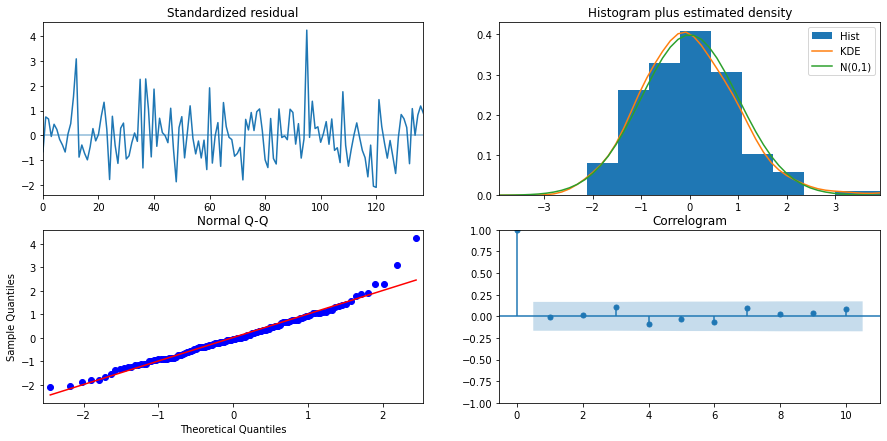

In [48]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

In [49]:
auto_model.scoring

'mse'

In [50]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

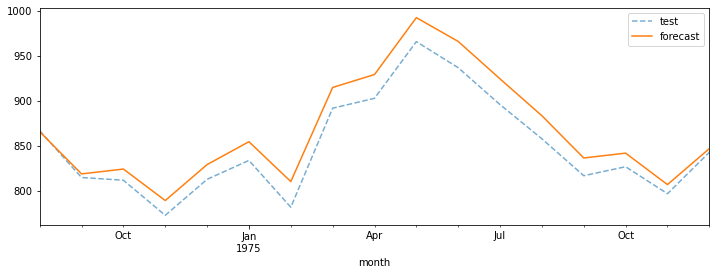

In [53]:
n = test.shape[0]
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

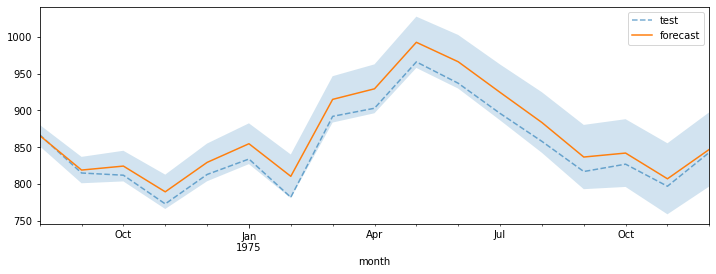

In [56]:
n = test.shape[0]
forecast, conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)
lower_ci, upper_ci  = zip(*conf_interval)

index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

In [57]:
sum(forecast) == sum(conf_interval.mean(axis=1))

True

## There is more

In [95]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [96]:
print(f'''
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
''')


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [97]:
# OCSB test
max_D = nsdiffs(milk, test='ocsb', m=12, max_D=12) 

In [98]:
print(f'''
Seasonal differencing (D) term: {max_D}
''')


Seasonal differencing (D) term: 1



In [99]:
model = pm.auto_arima(train, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test = 'kpss',
                      score='mape',
                      trace=True)

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1007.319, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=966.470, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=968.422, Time=0.46 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=983.036, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=968.438, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=970.470, Time=0.64 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=973.451, Time=0.71 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=968.640, Time=0.66 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=998.468, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=958.000, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=959.947, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=973.934, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=959.963, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=962.000, Time=0.88 sec
 ARIMA(0,1,1)

In [100]:
model.out_of_sample_size

0

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -472.969
Date:                            Thu, 24 Mar 2022   AIC                            957.937
Time:                                    01:40:01   BIC                            975.501
Sample:                                         0   HQIC                           965.075
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0461      0.621     -0.074      0.941      -1.263       1.171
ar.L1         -1.1997      0.092    -13.043      0.000      -1.380      -1.019
ar.L2         -0.3072      0.098     -3.137      0.002      -0.499      -0.115
ma.L1          0.9585      0.066     14.614      0.000       0.830       1.087
ma.S.L12      -0.6124      0.084     -7.289      0.000      -0.777      -0.448
sigma2        52.8052      5.479      9.637      0.000      42.066      63.544
===================================================================================
Ljung-Box (Q):                       21.98   Jarque-Bera (JB):                41.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.82
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

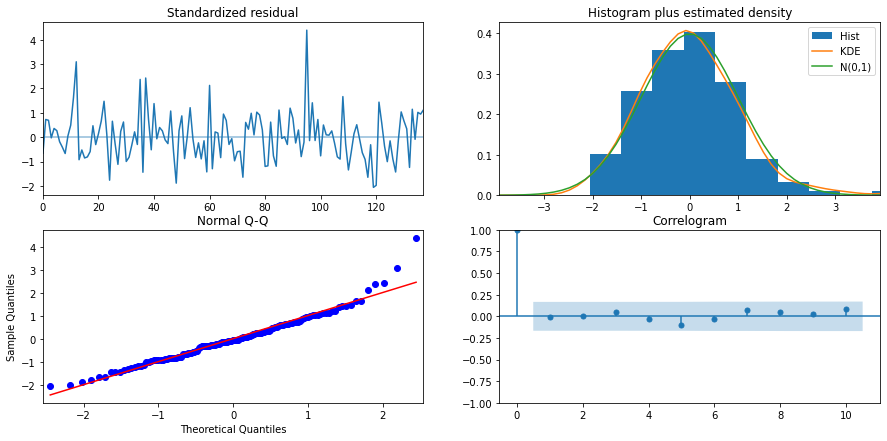

In [102]:
model.plot_diagnostics(figsize=(15,7));plt.show()

# Forecasting Time Series Data using Prophet

In [1]:
from prophet import Prophet

milk_file = Path('../../datasets/Ch11/milk_production.csv')
milk = pd.read_csv(milk_file, parse_dates=['month'], )
milk.columns = ['ds', 'y']

/Users/tarekatwan/opt/anaconda3/envs/ts/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [4]:
idx = round(len(milk) * 0.90)
train = milk[:idx]
test = milk[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 2)
Test: (17, 2)


In [5]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


<AxesSubplot:title={'center':'Monthly Milk Production'}, xlabel='ds'>

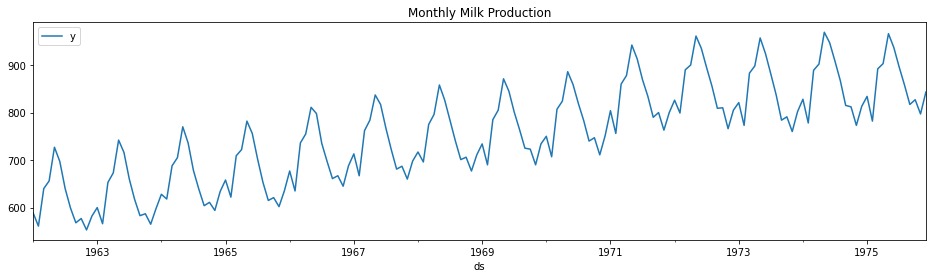

In [6]:
milk.set_index('ds').plot(title='Monthly Milk Production')

<AxesSubplot:xlabel='ds'>

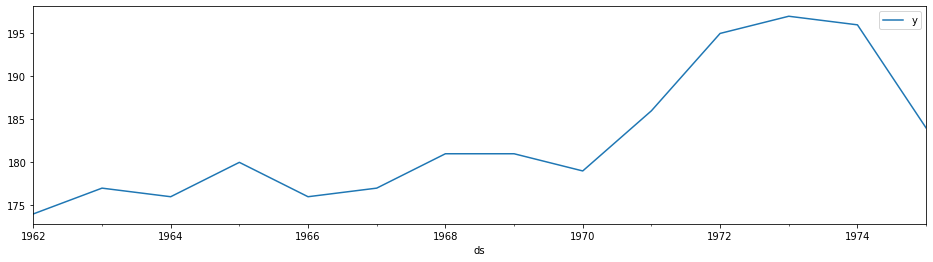

In [7]:
(milk.set_index('ds').resample('Y').max() - milk.set_index('ds').resample('Y').min()).plot()

<AxesSubplot:xlabel='ds'>

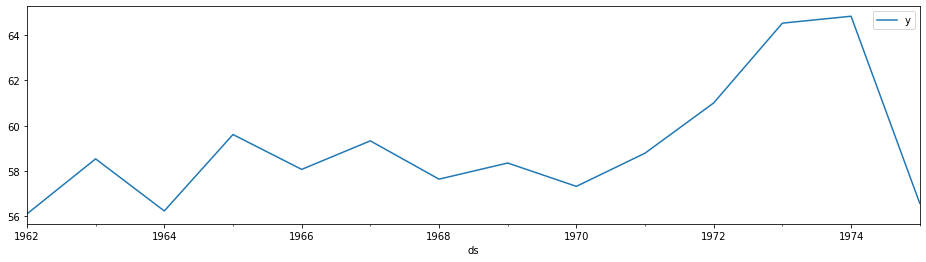

In [8]:
milk.set_index('ds').resample('Y').std().plot()

In [136]:
model = Prophet().fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.30844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       627.146    0.00871858       1129.66           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       634.492   0.000501091       335.791      0.2918      0.9652      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       634.894   2.98312e-05       124.573   1.907e-07       0.001      298  LS failed, Hessian reset 
     262       635.636   3.09362e-05       107.777   1.504e-07       0.001      379  LS failed, Hessian reset 
     299       636.054   0.000495742        226.47      0.9986      0.9986      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       637.354   4.85415e-05       80.6149       0.887       0.887      552   
    Iter      log pro

In [137]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [138]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [139]:
future = model.make_future_dataframe(len(test), freq='MS')

In [140]:
len(milk) == len(future)

True

In [141]:
future.shape

(168, 1)

In [142]:
forecast = model.predict(future)

In [143]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [144]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [145]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [146]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.919724,577.962460,596.210537
1,1962-02-01,547.514922,538.798935,556.023023
2,1962-03-01,641.526021,631.866573,650.302804
3,1962-04-01,659.337175,650.120268,668.109313
4,1962-05-01,722.409613,713.683673,731.650410


In [147]:
pd.concat([forecast['yhat'].iloc[0:5], train['y'].iloc[0:5]], axis=1)

,yhat,y
0,586.919724,589
1,547.514922,561
2,641.526021,640
3,659.337175,656
4,722.409613,727


In [148]:
pd.concat([forecast['yhat'].iloc[-5:], test['y'].iloc[-5:]], axis=1)

,yhat,y
163,841.554326,858
164,800.475070,817
165,804.708956,827
166,773.614666,797
167,806.863284,843


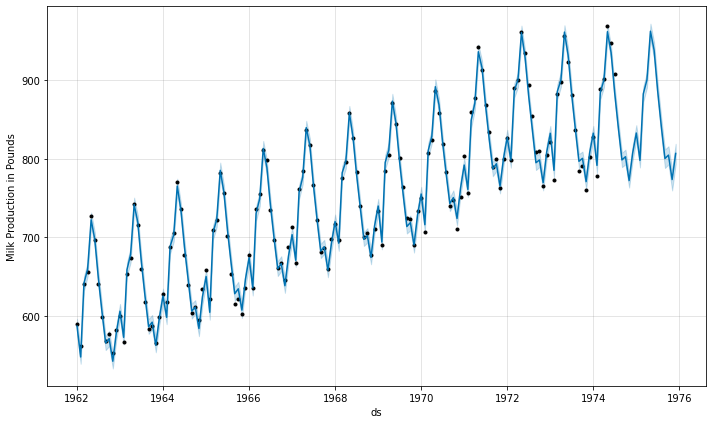

In [149]:
model.plot(forecast, ylabel='Milk Production in Pounds')
plt.show()

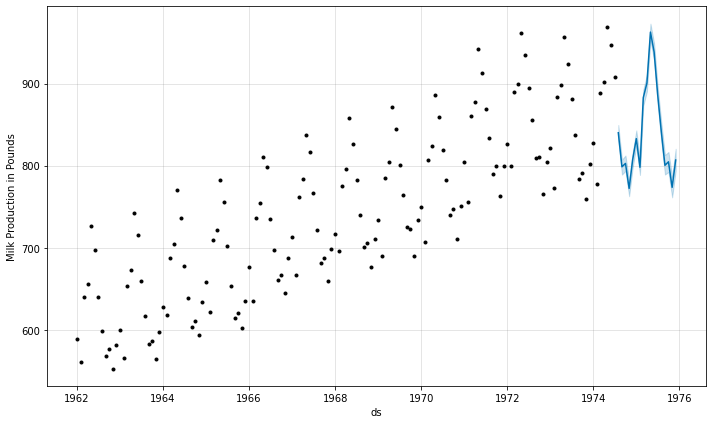

In [150]:
predicted = model.predict(test)
model.plot(predicted, ylabel='Milk Production in Pounds')
plt.show()

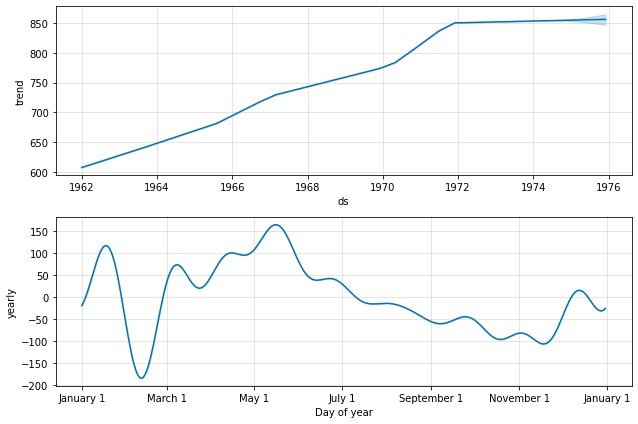

In [151]:
model.plot_components(forecast)
plt.show()

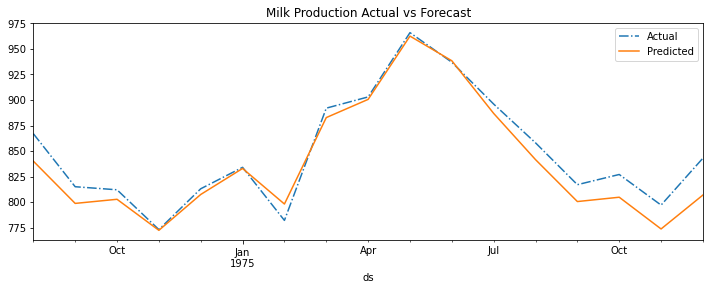

In [152]:
ax = test.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
plt.title('Milk Production Actual vs Forecast')
plt.show()

### How it works


In [153]:
model.changepoints.shape

(25,)

In [154]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [155]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [160]:
model.changepoints.head()

5    1962-06-01
10   1962-11-01
14   1963-03-01
19   1963-08-01
24   1964-01-01
Name: ds, dtype: datetime64[ns]

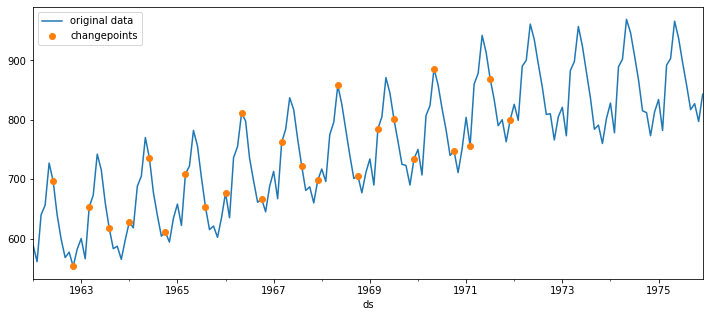

In [161]:
ax = milk.set_index('ds').plot(figsize=(12,5))
milk.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)
plt.legend(['original data', 'changepoints'])
plt.show()

### There is more

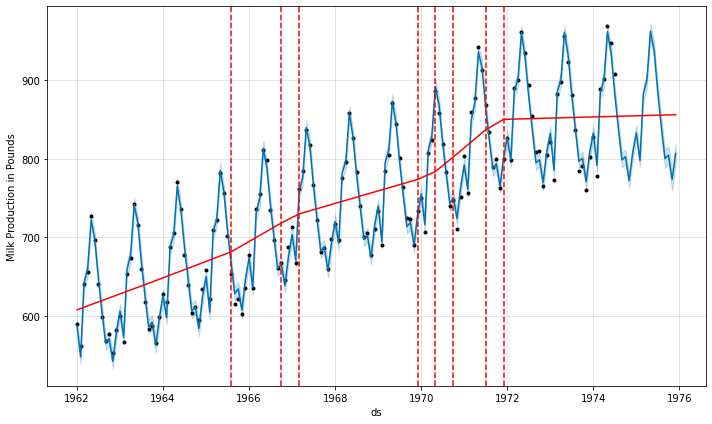

In [162]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

**Logistic Growth**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.14197
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       446.477    0.00258608       106.585      0.5101      0.5101      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       447.014   0.000506969         51.05   7.165e-06       0.001      196  LS failed, Hessian reset 
     156        447.04   0.000104071       60.6896     1.4e-06       0.001      286  LS failed, Hessian reset 
     199       447.046    9.1512e-06       77.8886      0.5712      0.5712      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       447.058   0.000162733       76.6966   2.529e-06       0.001      414  LS failed, Hessian reset 
     254       447.067   8.83354e-09        75.146     0.06696           1      488   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

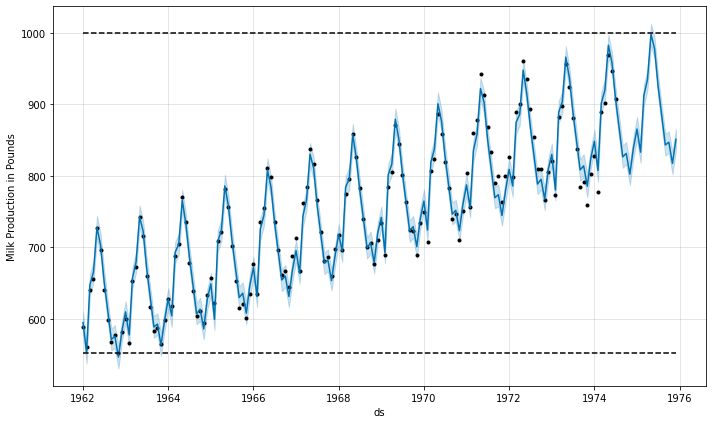

In [164]:
train['cap'] = 1000
train['floor']=train['y'].min()
model = (
        Prophet(growth='logistic')
         .fit(train)
        )

future = model.make_future_dataframe(len(test), freq='MS')
future['cap']=1000
future['floor']=train['y'].min()
forecast = model.predict(future)
model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

# Forecasting Multivariate Time Series Data using VAR

**VAR(1) Formula Example**
$$
\Large y_{(1),t} = \alpha_{1} + \theta_{11}y_{(1),t-1} + \theta_{12}y_{(2), t-1} + \epsilon_{(1),t} \\\Large y_{(2),t} = \alpha_{2} + \theta_{21}y_{(1),t-1} + \theta_{22}y_{(2),t-1} + \epsilon_{(2),t} 
\\~\\
\\~\\
\Large \begin{bmatrix} y_{(1),t} \\ y_{(2),t} \end{bmatrix} =
\Large \begin{bmatrix} \alpha_{1} \\ \alpha_{2} \end{bmatrix} + \begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} &  \theta_{22} \end{bmatrix}  \begin{bmatrix} y_{(1),t-1} \\ y_{(2), t-1} \end{bmatrix} + \begin{bmatrix} \epsilon_{(1),t} \\ \epsilon_{(2),t} \end{bmatrix}
$$

In [1]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR,adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests

/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import statsmodels as sm
import matplotlib as mp

In [3]:
print(
f'''
======================
LIBRARY VERSIONS USED
======================

pandas: {pd.__version__}
matplotlib: {mp.__version__}
statsmodels: {sm.__version__}
'''
)


LIBRARY VERSIONS USED

pandas: 1.4.1
matplotlib: 3.5.1
statsmodels: 0.11.1



**Uncomment if you want to pull the data from the API**

In [4]:
file = Path('../../datasets/Ch11/economic_df.pickle')

# start = "01-01-1990"
# end = "03-01-2022"

# economic_df = web.FredReader(symbols=["FEDFUNDS", "unrate"], 
#                             start=start, end=end).read()

# economic_df.to_pickle(file)

In [5]:
economic_df = pd.read_pickle(file)

In [6]:
economic_df.head()

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4


In [7]:
economic_df.tail()

,FEDFUNDS,unrate
DATE,,
2021-10-01,0.08,4.6
2021-11-01,0.08,4.2
2021-12-01,0.08,3.9
2022-01-01,0.08,4.0
2022-02-01,0.08,3.8


In [8]:
economic_df.isna().sum()

FEDFUNDS    0
unrate      0
dtype: int64

In [9]:
economic_df.asfreq = 'MS'

In [10]:
economic_df.shape

(386, 2)

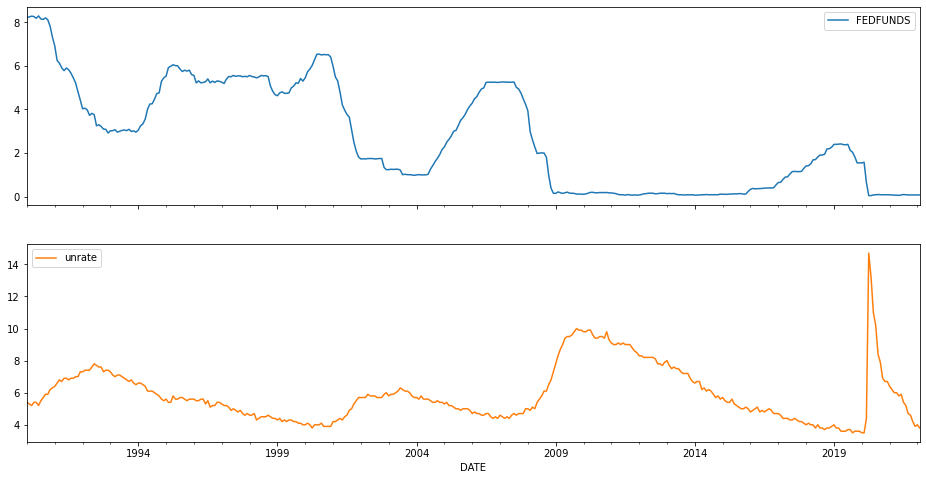

In [11]:
economic_df.plot(subplots=True, figsize=(16,8)); plt.show()

In [9]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)

In [10]:
for i in economic_df:
    kps, adf = check_stationarity(economic_df[i])
    print(f'{i} adf: {adf}, kpss: {kps}')

FEDFUNDS adf: Stationary, kpss: Non-stationary
unrate adf: Stationary, kpss: Stationary


/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [11]:
# res = coint_johansen(econ_scaled, -1, 10)
# res.lr1
# res.cvt
# res.lr2
# res.trace_stat_crit_vals

In [12]:
economic_df

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4
...,...,...
2021-10-01,0.08,4.6
2021-11-01,0.08,4.2
2021-12-01,0.08,3.9


In [13]:
granger = grangercausalitytests(economic_df[['unrate', 'FEDFUNDS']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6533  , p=0.4194  , df_denom=382, df_num=1
ssr based chi2 test:   chi2=0.6584  , p=0.4171  , df=1
likelihood ratio test: chi2=0.6579  , p=0.4173  , df=1
parameter F test:         F=0.6533  , p=0.4194  , df_denom=382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.6059 , p=0.0000  , df_denom=379, df_num=2
ssr based chi2 test:   chi2=43.7819 , p=0.0000  , df=2
likelihood ratio test: chi2=41.4609 , p=0.0000  , df=2
parameter F test:         F=21.6059 , p=0.0000  , df_denom=379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.4772 , p=0.0000  , df_denom=376, df_num=3
ssr based chi2 test:   chi2=65.6310 , p=0.0000  , df=3
likelihood ratio test: chi2=60.5775 , p=0.0000  , df=3
parameter F test:         F=21.4772 , p=0.0000  , df_denom=376, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.0562 , p=0.0000  

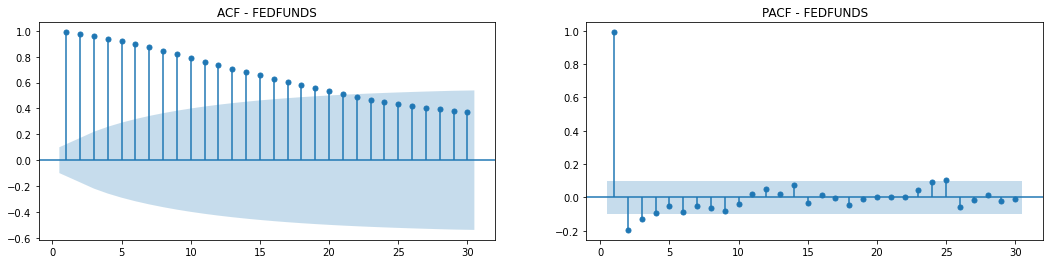

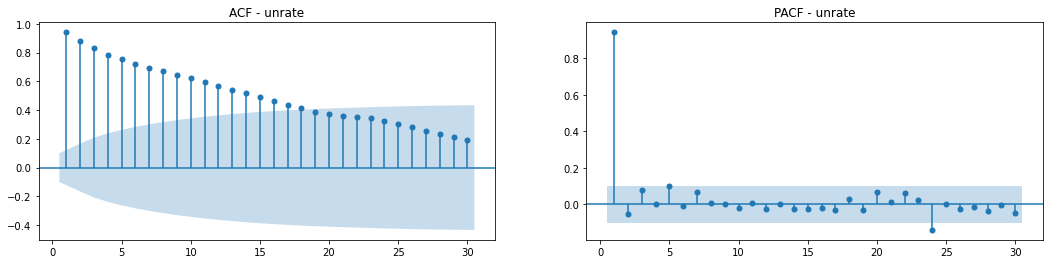

In [14]:
for col in economic_df.columns:
    fig, ax = plt.subplots(1,2, figsize=(18,4))
    plot_acf(economic_df[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(economic_df[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

<AxesSubplot:xlabel='FEDFUNDS', ylabel='unrate'>

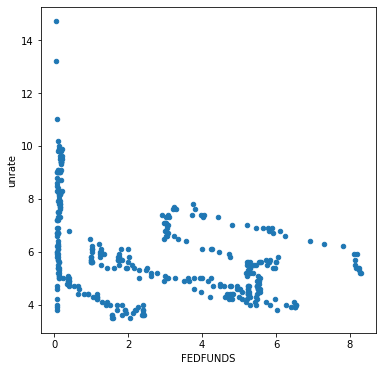

In [15]:
economic_df.plot(kind='scatter', x='FEDFUNDS', y='unrate', figsize=(6,6))

In [16]:
train_stage1 = economic_df.loc[:'2015']
test_stage1 = economic_df.loc['2016':'2019']

In [21]:
print(f'Train: {len(train_stage1)}, Test: {len(test_stage1)}')

Train: 312, Test: 48


In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_stage1_sc = pd.DataFrame(scale.fit_transform(train_stage1),
                            index=train_stage1.index,
                              columns=train_stage1.columns)
test_stage1_sc = pd.DataFrame(scale.transform(test_stage1), 
                           index=test_stage1.index,
                             columns=test_stage1.columns)

<AxesSubplot:xlabel='DATE'>

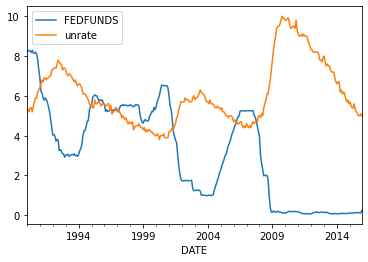

In [23]:
train_stage1.plot()

In [24]:
train_stage1_sc.shape

(312, 2)

In [25]:
test_stage1_sc.shape

(48, 2)

<AxesSubplot:xlabel='DATE'>

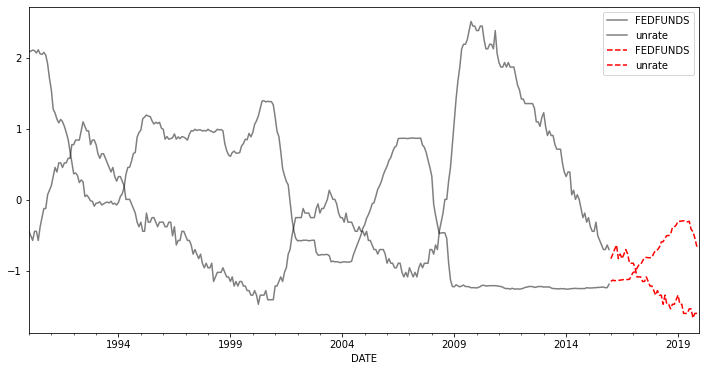

In [26]:
ax = train_stage1_sc.plot(style='k', figsize=(12,6), alpha=0.5)
test_stage1_sc.plot(ax=ax, style='r--')

In [26]:
# idx = round(len(economic_df) * 0.90)
# train = economic_df[:idx]
# test = economic_df[idx:]
# print(train.shape)
# print(test.shape)

In [31]:
model = VAR(endog=train_stage1_sc, freq='MS')
res = model.select_order(maxlags=10)
res.summary()

,AIC,BIC,FPE,HQIC
0,-0.6300,-0.6055,0.5326,-0.6202
1,-9.832,-9.758,5.370e-05,-9.803
2,-10.37,-10.25,3.129e-05,-10.32
3,-10.42,-10.25*,2.969e-05,-10.36
4,-10.47,-10.25,2.831e-05,-10.38*
5,-10.46,-10.19,2.873e-05,-10.35
6,-10.48,-10.16,2.819e-05,-10.35
7,-10.50*,-10.14,2.742e-05*,-10.36
8,-10.48,-10.06,2.805e-05,-10.31
9,-10.47,-10.00,2.838e-05,-10.28


In [32]:
print(f'AIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 7 , BIC: 3, HQ: 4, FPE: 7


In [33]:
results = model.fit(maxlags=7, ic='aic')

In [34]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 27, Mar, 2022
Time:                     05:31:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.1347
Nobs:                     305.000    HQIC:                  -10.3543
Log likelihood:           765.794    FPE:                2.75235e-05
AIC:                     -10.5006    Det(Omega_mle):     2.50036e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.002969         0.003278           -0.906           0.365
L1.FEDFUNDS         1.441750         0.057948           24.880           0.000
L1.unrate          -0.064220         0.035478           -1.810   

In [31]:
type(results)

statsmodels.tsa.vector_ar.var_model.VARResultsWrapper

In [48]:
lag_order = results.k_ar
lag_order

7

In [36]:
results.params

,FEDFUNDS,unrate
const,-0.002969,-0.004815
L1.FEDFUNDS,1.441750,-0.251804
L1.unrate,-0.064220,0.954515
L2.FEDFUNDS,-0.307818,0.364056
L2.unrate,0.044655,0.123182
L3.FEDFUNDS,-0.035941,-0.292113
L3.unrate,-0.012727,0.030407
L4.FEDFUNDS,-0.241145,0.253550
L4.unrate,0.033568,-0.072508
L5.FEDFUNDS,0.148952,-0.178265


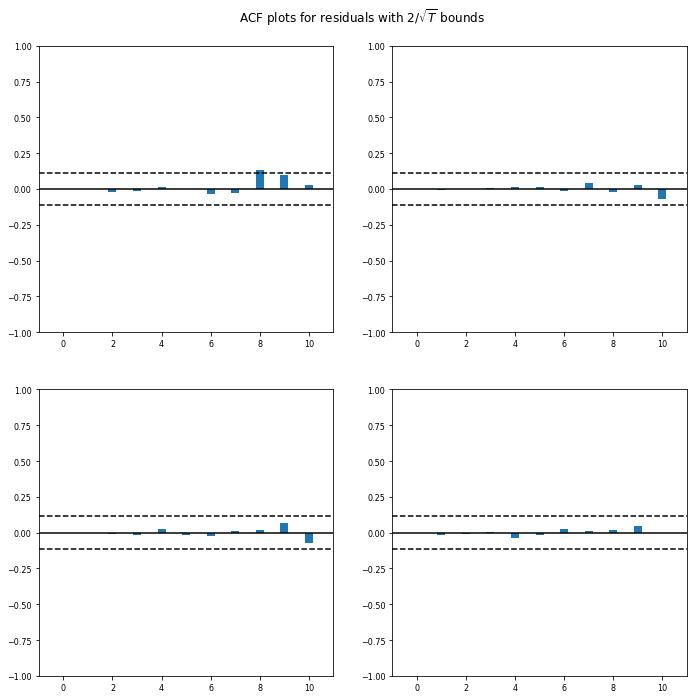

In [37]:
results.plot_acorr(resid=True);plt.show()

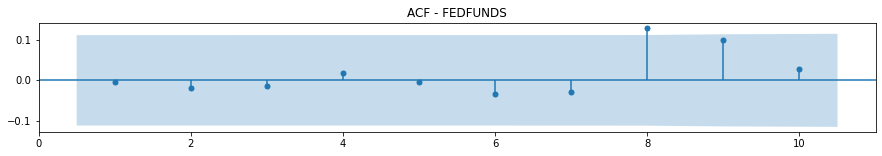

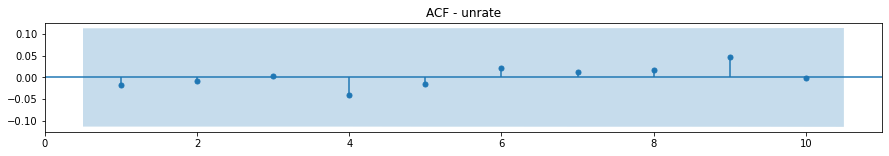

In [46]:
# You can plot your ACF on the resiuals as well using results.resid
for col in results.resid.columns:
    fig, ax = plt.subplots(1,1, figsize=(15,2))
    plot_acf(results.resid[col], zero=False, 
             lags=10, ax=ax, title=f'ACF - {col}')

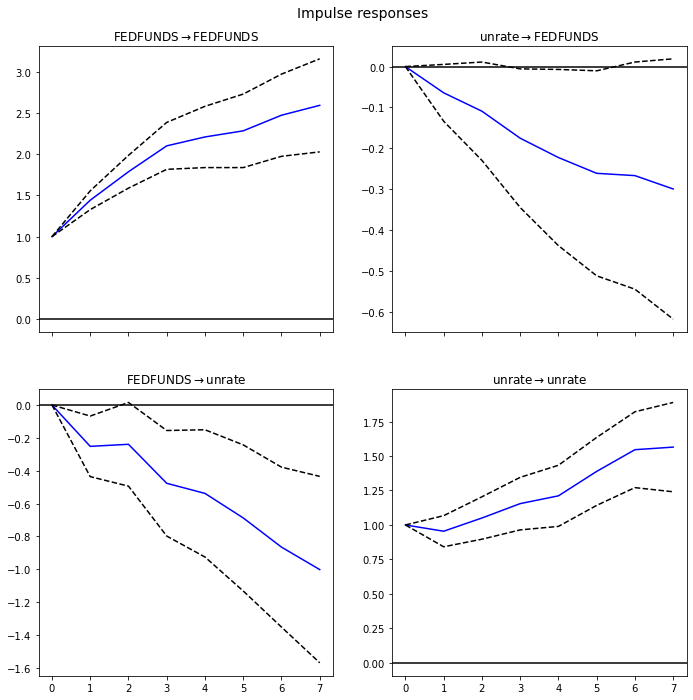

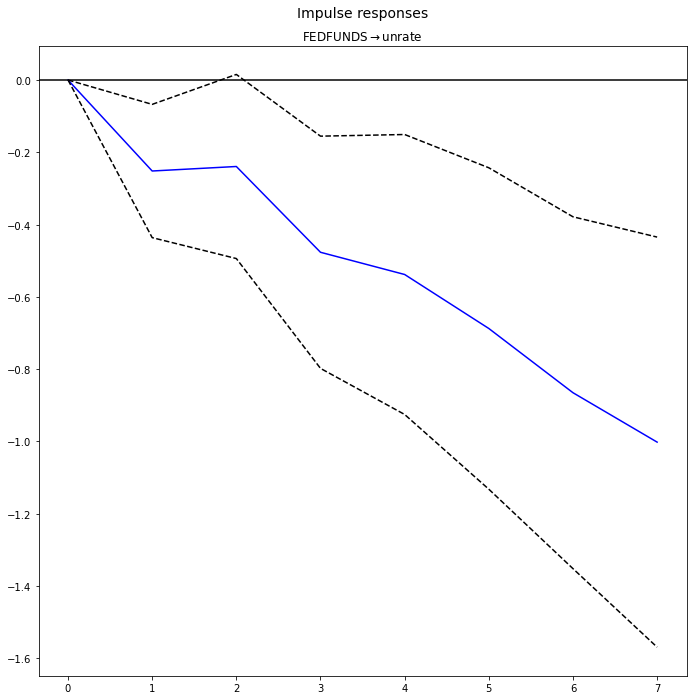

In [72]:
irf = results.irf(7)
irf.plot();
irf.plot(impulse='FEDFUNDS', response='unrate');plt.show()

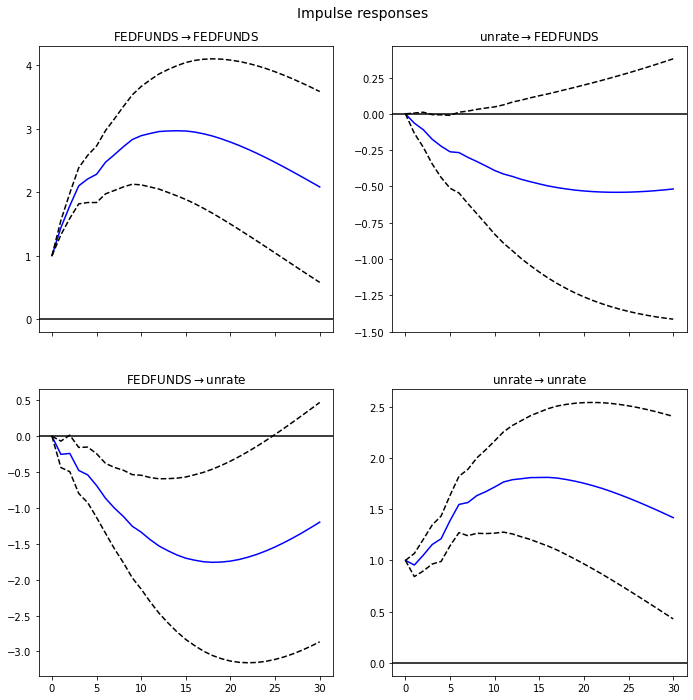

In [76]:
# Example changing lag value
irf = results.irf(30)
irf.plot();

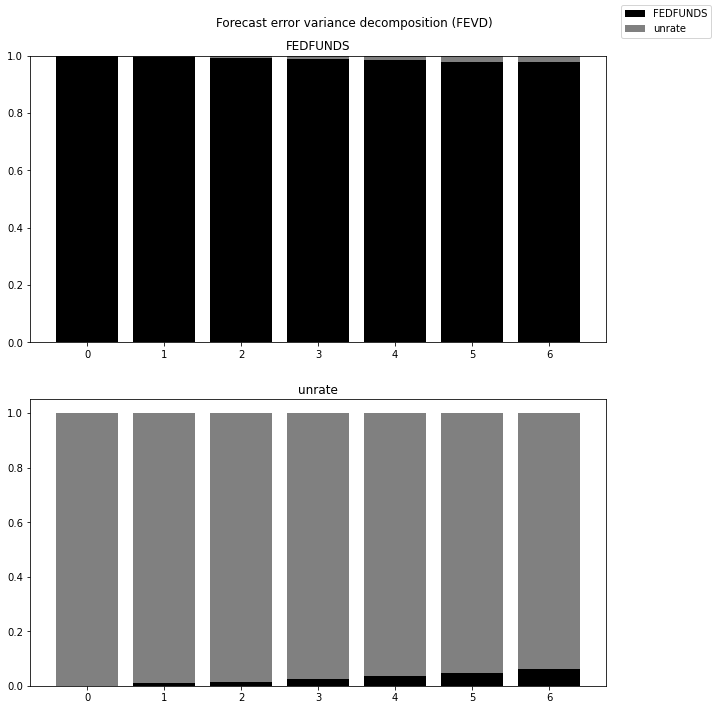

In [79]:
results.fevd(periods=7).plot();plt.show()

In [80]:
train_stage1_sc[-lag_order:]

,FEDFUNDS,unrate
DATE,,
2015-06-01,-1.237360,-0.510771
2015-07-01,-1.237360,-0.575081
2015-08-01,-1.233254,-0.639391
2015-09-01,-1.233254,-0.703701
2015-10-01,-1.241465,-0.703701
2015-11-01,-1.241465,-0.639391
2015-12-01,-1.192202,-0.703701


In [83]:
past_y = train_stage1_sc[-lag_order:].values
n = test_stage1_sc.shape[0]
forecast = results.forecast(past_y, n)

<AxesSubplot:xlabel='DATE'>

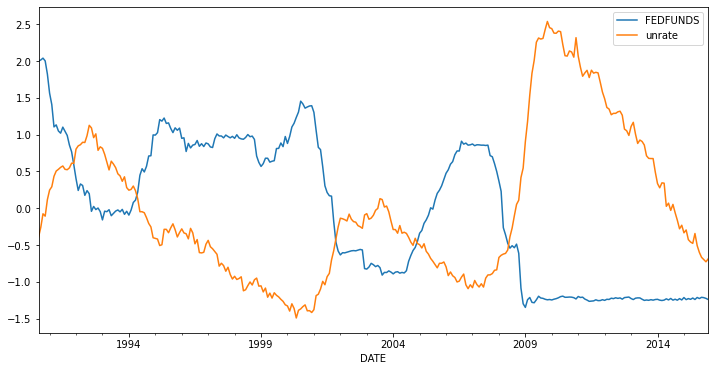

In [372]:
results.fittedvalues.plot(figsize=(12,6))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

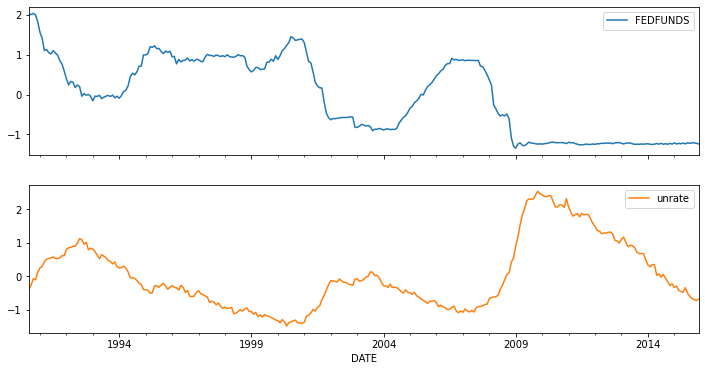

In [81]:
results.fittedvalues.plot(figsize=(12,6), subplots=True)

In [84]:
forecast[0:10]

array([[-1.15880884, -0.72502144],
       [-1.1253202 , -0.74040474],
       [-1.08799929, -0.76252777],
       [-1.0578285 , -0.75939846],
       [-1.02534941, -0.77148404],
       [-0.98976628, -0.79484306],
       [-0.95461755, -0.80729316],
       [-0.91795279, -0.82271916],
       [-0.88053087, -0.83590069],
       [-0.84387053, -0.8470569 ]])

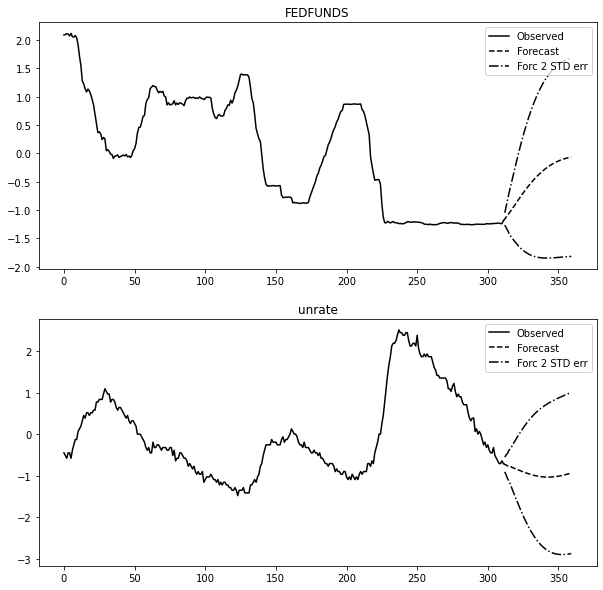

In [85]:
results.plot_forecast(n, plot_stderr=True);

**Manually creating a similar plot**

In [91]:
past_y.shape

(7, 2)

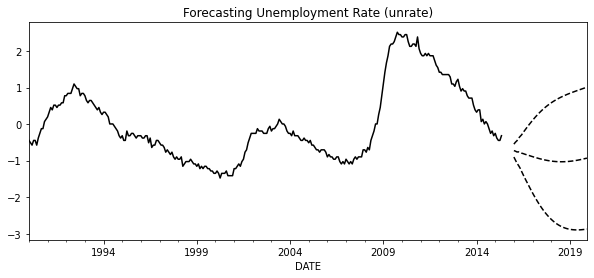

In [101]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test_stage1.index
style = 'k--'
ax = train_stage1_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.show()
# plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.2)

Alternatively you can also use `fill_between`

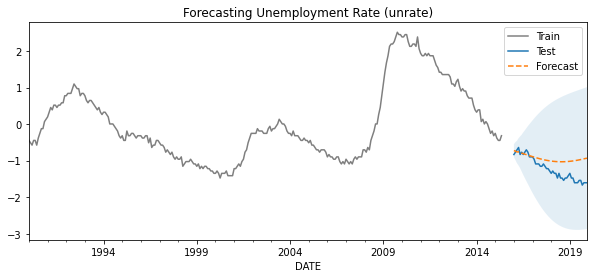

In [121]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test_stage1.index
ax = train_stage1_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k', alpha=0.5)
test_stage1_sc['unrate'].plot(style='-', figsize=(10, 4)).plot(ax=ax)
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style='--')
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.12)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.legend(['Train','Test', 'Forecast'])
plt.show()

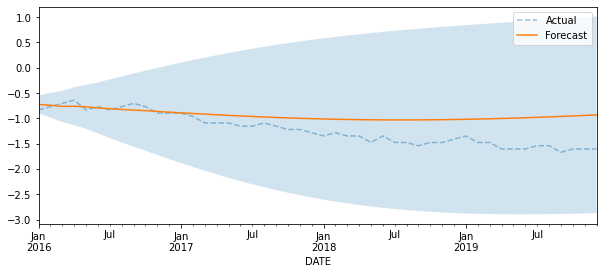

In [104]:
test_stage1_sc['unrate'].plot(style='--', alpha=0.45, figsize=(10, 4)).plot()
pd.Series(forecast[ :, 1], index=test_stage1_sc.index).plot()
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.2)
plt.legend(['Actual', 'Forecast'])

## Comparing the results from VAR(7) with an AR(7) 
* AR(7) is a univariate this way we are comparing using one variable (unrate) to see if using two variables are better or not
* Using ARIMA(7, 0, 0) indicates an AR(7)

In [383]:
from statsmodels.tsa.arima.model import ARIMA

In [384]:
model = ARIMA(train_stage1_sc['unrate'], order=(lag_order,0,0)).fit()

/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "

In [385]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  312
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 303.098
Date:                Fri, 25 Mar 2022   AIC                           -588.196
Time:                        01:57:04   BIC                           -554.509
Sample:                    01-01-1990   HQIC                          -574.732
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0799      0.412     -0.194      0.846      -0.887       0.727
ar.L1          0.9619      0.050     19.120      0.000       0.863       1.061
ar.L2          0.1636      0.074      2.204      0.028       0.018       0.309
ar.L3          0.0261      0.082      0.317      0.751      -0.136       0.188
ar.L4         -0.0743      0.081     -0.913      0.361      -0.234       0.085
ar.L5          0.0920      0.077      1.194      0.232      -0.059       0.243
ar.L6         -0.0087      0.082     -0.107      0.915      -0.169       0.151
ar.L7         -0.1743      0.055     -3.145      0.002      -0.283      -0.066
sigma2         0.0082      0.001     13.409      0.000       0.007       0.009
===================================================================================
Ljung-Box (Q):                       43.54   Jarque-Bera (JB):                 6.66
Prob(Q):                              0.32   Prob(JB):                         0.04
Heteroskedasticity (H):               1.40   Skew:                             0.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

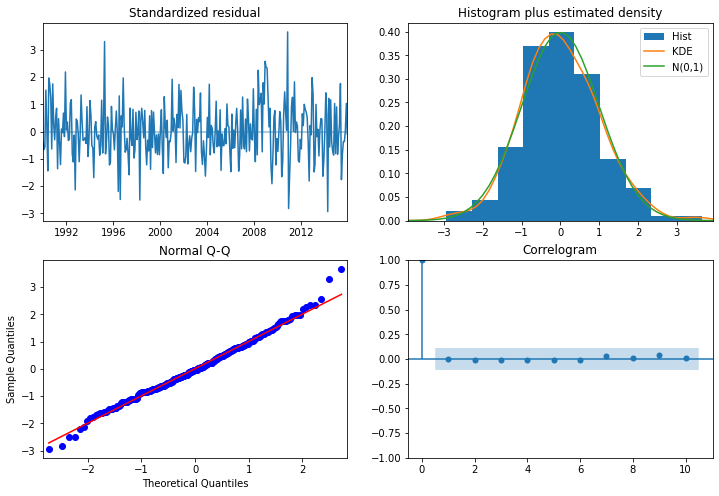

In [386]:
model.plot_diagnostics(figsize=(12,8));plt.show()

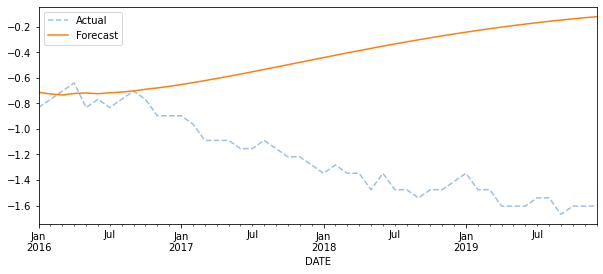

In [389]:
# Plotting the results from an AR(7)
test_stage1_sc['unrate'].plot(style='--', alpha=0.45, figsize=(10, 4))
pd.Series(model.forecast(n), index=test_stage1_sc.index).plot()
plt.legend(['Actual', 'Forecast'])

In [137]:
forecast, lower_ci, upper_ci = results.forecast_interval(past_y, n)

index = test_stage2_sc.index
ax = test_stage2_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci[:,1], upper_ci[:,1], alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

### There is more

In [122]:
train_stage2 = economic_df.loc[:'2020']
test_stage2 = economic_df.loc['2021']

In [123]:
scale = StandardScaler()
train_stage2_sc = pd.DataFrame(scale.fit_transform(train_stage2),
                            index=train_stage2.index,
                              columns=train_stage2.columns)
test_stage2_sc = pd.DataFrame(scale.transform(test_stage2), 
                           index=test_stage2.index,
                             columns=test_stage2.columns)

In [124]:
train_stage2_sc.shape

(372, 2)

In [125]:
test_stage2_sc.shape

(12, 2)

In [128]:
model = VAR(endog=train_stage2_sc, freq='MS')
results = model.fit(maxlags=30, ic='aic')

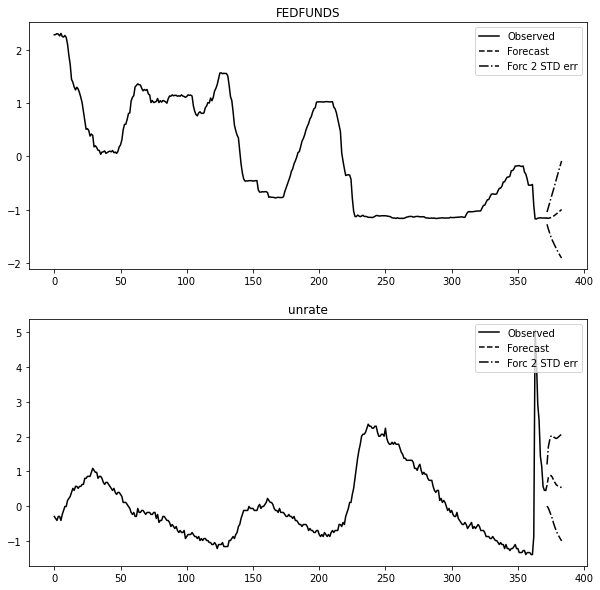

In [134]:
n = test_stage2_sc.shape[0]
results.plot_forecast(n); plt.show()

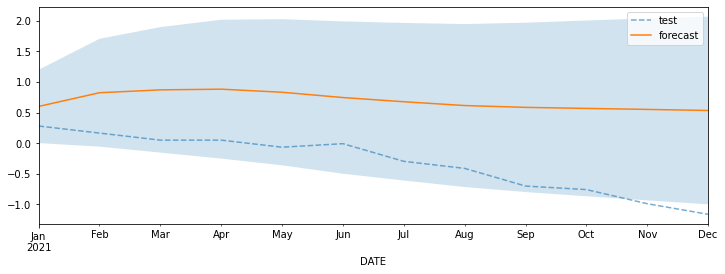

In [135]:
forecast, lower_ci, upper_ci = results.forecast_interval(past_y, n)

index = test_stage2_sc.index
ax = test_stage2_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci[:,1], upper_ci[:,1], alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

# Forecasting Volatility in Financial Time Series Data with GARCH


In [116]:
import arch
arch.__version__

'5.1.0'

In [117]:
from arch import arch_model

In [118]:
msft = pd.read_csv('../../datasets/Ch11/msft.csv', 
                   index_col='Date', 
                   parse_dates=True)
msft.head()

,close
Date,
2010-01-04,23.904985
2010-01-05,23.912710
2010-01-06,23.765955
2010-01-07,23.518789
2010-01-08,23.680998


In [119]:
msft['returns'] = 100 * msft.pct_change()
msft.dropna(inplace=True, how='any')
msft.head()

,close,returns
Date,,
2010-01-05,23.912710,0.032314
2010-01-06,23.765955,-0.613712
2010-01-07,23.518789,-1.039999
2010-01-08,23.680998,0.689698
2010-01-11,23.379765,-1.272046


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

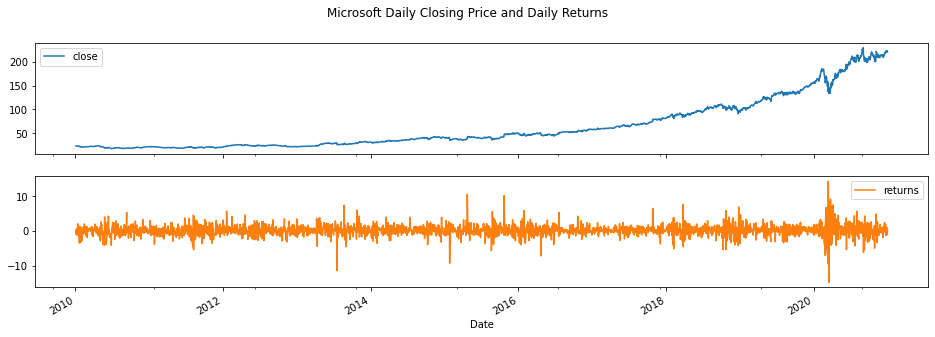

In [129]:
msft.plot(subplots=True, 
          title='Microsoft Daily Closing Price and Daily Returns')

In [132]:
# # fig, ax = plt.subplots(1,2, figsize=(20,3))
# plot_acf(msft['returns'], zero=False);plt.show()
# plot_pacf(msft['returns'], zero=False); plt.show()

In [122]:
# volatility = msft_return.std()
# volatility

In [123]:
# annualized = np.sqrt(252)*volatility
# annualized

In [105]:
# msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [124]:
idx = round(len(msft) * 0.90)
train = msft.returns[:idx]
test = msft.returns[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (2491,)
Test: (277,)


In [133]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Constant',
                   vol='GARCH',
                   dist='normal')

In [138]:
results = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4374.845453710037
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4361.891627557763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4361.891627557763
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


In [139]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Mon, Mar 28 2022   Df Residuals:                     2490
Time:                        03:49:12   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [140]:
results.params

mu          0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

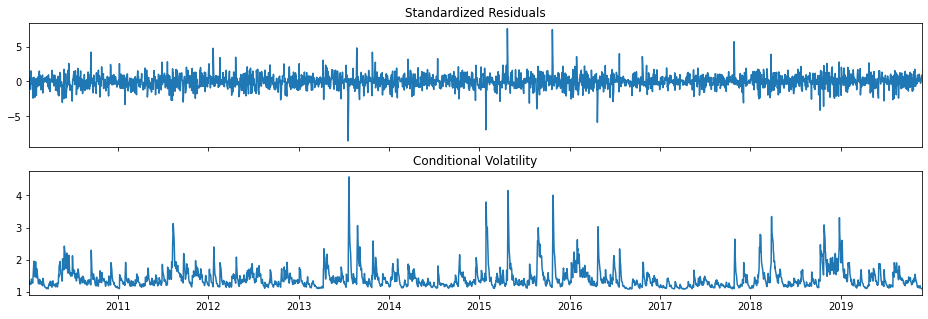

In [143]:
results.plot(); plt.show()

In [72]:
results.std_err

mu          0.028837
omega       0.149074
alpha[1]    0.048233
beta[1]     0.093537
Name: std_err, dtype: float64

Text(0.5, 1.0, 'Standardized Residuals')

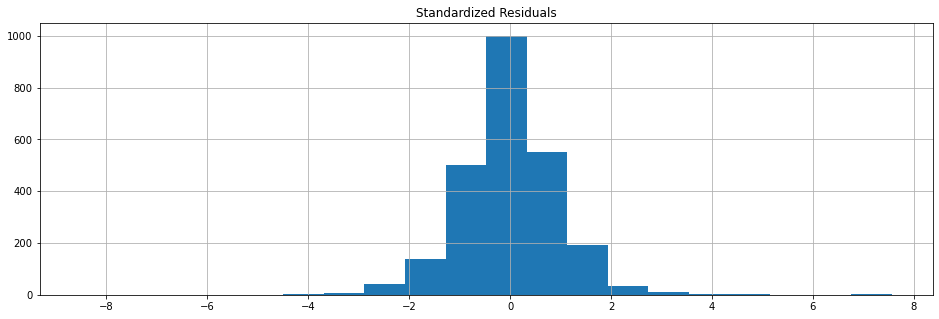

In [151]:
results.std_resid.hist(bins=20)
plt.title('Standardized Residuals')

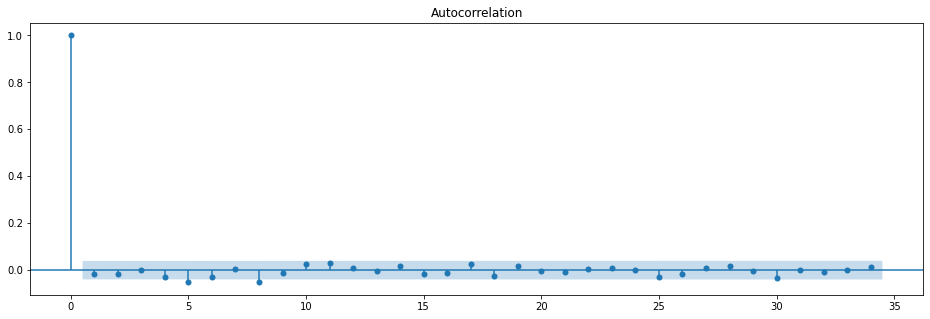

In [170]:
plot_acf(results.std_resid);plt.show()

In [186]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.std_resid, 
               lags=10, 
               return_df=True)['lb_pvalue']

1     0.396521
2     0.530357
3     0.735656
4     0.473760
5     0.087968
6     0.070935
7     0.109796
8     0.017272
9     0.025041
10    0.021833
Name: lb_pvalue, dtype: float64

In [154]:
msft_forecast = results.forecast(horizon=test.shape[0])

In [188]:
msft_forecast.variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,1.341888,1.482559,1.600301,1.69885,1.781336,1.850377,1.908163,1.956531,1.997014,2.030899,...,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893


In [155]:
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,...,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615


<AxesSubplot:xlabel='Date'>

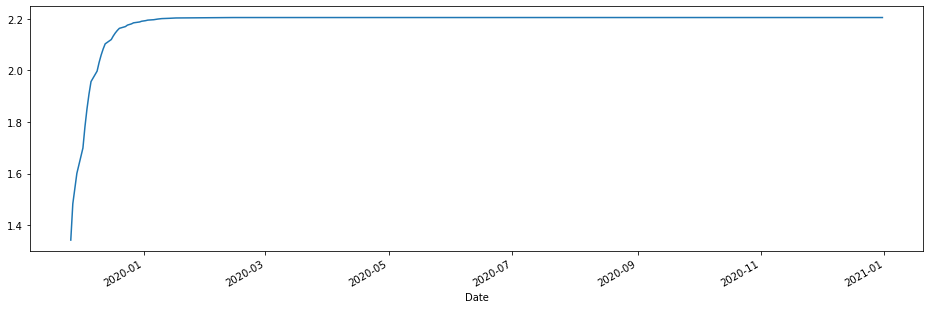

In [189]:
forecast = msft_forecast.variance[-1:]
pd.Series(forecast.values.ravel(), index=test.index).plot()

## There is more

In [203]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Zero',
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)

In [204]:
results.params

omega       0.345501
alpha[1]    0.130555
beta[1]     0.711339
Name: params, dtype: float64

In [205]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4371.30
Distribution:                  Normal   AIC:                           8748.59
Method:            Maximum Likelihood   BIC:                           8766.06
                                        No. Observations:                 2491
Date:                Mon, Mar 28 2022   Df Residuals:                     2491
Time:                        04:37:36   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3455      0.127      2.717  6.594e-03 [9.624e-02,  0.595]
alpha[1]       0.1306  3.998e-02      3.266  1.091e-03 [5.220e-02,  0.209]
beta[1]        0.7113  8.038e-02      8.850  8.787e-19   [  0.554,  0.869]
==========================================================================

Covariance estimator: robust
"""

In [206]:
msft_forecast = results.forecast(horizon=test.shape[0])
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='LS', lags=1,
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)
results.params

Const       0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

In [220]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                returns   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4360.29
Distribution:                  Normal   AIC:                           8730.58
Method:            Maximum Likelihood   BIC:                           8759.68
                                        No. Observations:                 2490
Date:                Mon, Mar 28 2022   Df Residuals:                     2488
Time:                        04:46:13   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.1174  2.742e-02      4.282  1.853e-05    [6.367e-02,  0.171]
returns[1]    -0.0231  2.689e-02     -0.859      0.390 [-7.580e-02,2.961e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3575      0.129      2.763  5.730e-03   [  0.104,  0.611]
alpha[1]       0.1438  4.441e-02      3.239  1.200e-03 [5.680e-02,  0.231]
beta[1]        0.6937  8.344e-02      8.313  9.297e-17   [  0.530,  0.857]
==========================================================================

Covariance estimator: robust
"""

In [221]:
results.model

AR(constant: yes, lags: 1, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7fe3eefb2a00

# Forecasting Time Series Data using Kalman Filter Algorithm

In [40]:
from darts import TimeSeries
from darts.models import KalmanFilter, FFT, ExponentialSmoothing, AutoARIMA

In [35]:
milk_model = ExponentialSmoothing(seasonal_periods=12)
milk_ts = TimeSeries.from_dataframe(milk.reset_index(), 
                                    time_col='month', value_cols='production', freq='MS')

In [101]:
milk.shape

(168, 1)

In [110]:
test_split = 0.15
l = len(milk)
t_idx = l - round(l*test_split)
milk_train = milk_ts.diff()[ : t_idx]
milk_test = milk_ts.diff()[t_idx : ]
# milk_train, milk_test = split_data(milk_ts.diff(), p)

In [111]:
milk_model.fit(milk_train)
milk_pred = milk_model.predict(len(milk_test), num_samples=1000)

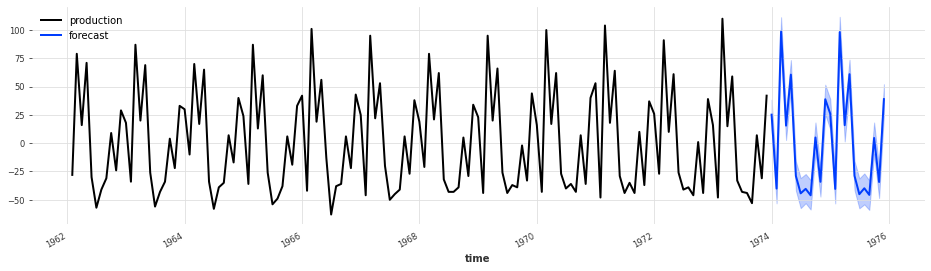

In [112]:
milk_train.plot()
milk_pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [116]:
milk_filtered = KalmanFilter().filter(milk_ts.diff())
milk_model_filtered = ExponentialSmoothing(seasonal_periods=12)

p = 0.15
# milk_train_filtered, milk_test_filtered = split_data(milk_filtered, p)
milk_train_filtered = milk_filtered[ : t_idx]
milk_test_filtered = milk_filtered[t_idx : ]

In [117]:
milk_model_filtered.fit(milk_train_filtered)
milk_pred_filtered = milk_model_filtered.predict(len(milk_test), num_samples=1000)

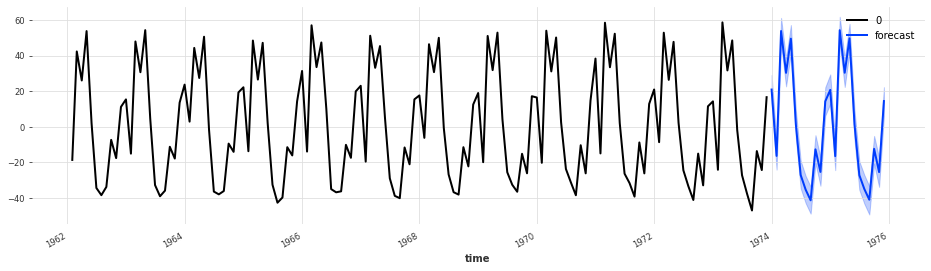

In [118]:
milk_train_filtered.plot()
milk_pred_filtered.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

# Forecasting Time Series with Multiple Seasonal Components using TBATS

In [13]:
from sktime.forecasting.tbats import TBATS

In [14]:
web = Path('../../datasets/Ch9/web_traffic.csv')
weather = Path('../../datasets/Ch9/weather.csv')
elec = Path('../../datasets/Ch9/vic_elec.csv')

In [15]:
electdemand = pd.read_csv(elec, 
                          index_col='Time', 
                          parse_dates=True,
                         usecols=['Time', 'Demand', 'Temperature'])

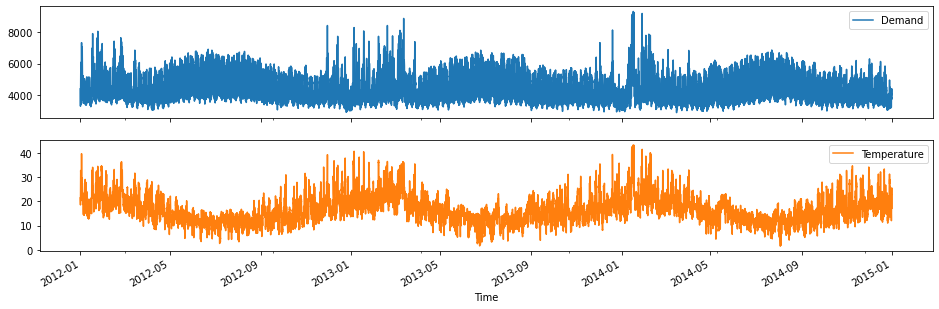

In [16]:
electdemand.plot(subplots=True,figsize=(16, 5)); plt.show()

In [17]:
elect2014 = electdemand['Demand'].loc['2014':]

In [21]:
elect2014 = elect2014.sort_index()

In [45]:
train, test = split_data(elect2014, 0.75)

train: 4380 , test: 13140


In [23]:
model = TBATS(sp=[14, 30.5], n_jobs=1, use_box_cox=False, use_trend=False, use_damped_trend=False)

In [46]:
model = TBATS()

In [47]:
model.fit(train)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=None, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)

In [41]:
model.predict(fh=[1,2,3])

In [39]:
test.index[0:3].values.tolist()

[1407452400000000000, 1407454200000000000, 1407456000000000000]

In [48]:
model.check_is_fitted()

In [49]:
model.get_fitted_params()

{'a': None, 'i': None, 'c': None}

In [42]:
model.get_test_params()